In [975]:
import pandas  as pd
import numpy as np
import numpy.typing as npt
from matplotlib import pyplot as plt 
import seaborn as sns
import pygwalker as pyg
import Classification_plots as plots
from importlib import reload 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import FunctionTransformer, StandardScaler , MinMaxScaler , OneHotEncoder , MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from collections import Counter

reading data from CSV

In [857]:
Customer= pd.read_csv('./Fact&dim-csv/Dim_Customer.csv')
Date = pd.read_csv('./Fact&dim-csv/Dim_Date.csv')
Geography = pd.read_csv('./Fact&dim-csv/Dim_Geography.csv')
Market = pd.read_csv('./Fact&dim-csv/Dim_Market.csv')
Priority = pd.read_csv('./Fact&dim-csv/Dim_Priority.csv')
Product = pd.read_csv('./Fact&dim-csv/Dim_Product.csv')
Ship_mode = pd.read_csv('./Fact&dim-csv/Dim_Ship_Mode.csv')
Fact_Sales = pd.read_csv('./Fact&dim-csv/Fact_Sales.csv')

### Preparing Dataset

Take a look at Data 

In [858]:
Date

,Date,Year,Month,Day,Quarter,Date Key,Day of Week
0,2014-11-05 00:00:00.000,2014,11,5,4,20141105,3
1,2014-12-13 00:00:00.000,2014,12,13,4,20141213,6
2,2014-12-30 00:00:00.000,2014,12,30,4,20141230,2
3,2014-10-27 00:00:00.000,2014,10,27,4,20141027,1
4,2014-12-25 00:00:00.000,2014,12,25,4,20141225,4
...,...,...,...,...,...,...,...
1463,2015-01-02 00:00:00.000,2015,1,2,1,20150102,5
1464,2015-01-05 00:00:00.000,2015,1,5,1,20150105,1
1465,2015-01-04 00:00:00.000,2015,1,4,1,20150104,0
1466,2015-01-06 00:00:00.000,2015,1,6,1,20150106,2


In [859]:
Geography 

,City,State,Country,Region,Geo Key
0,Sacramento,California,United States,West,9
1,Los Angeles,California,United States,West,27
2,Fresno,California,United States,West,32
3,Huntington Beach,California,United States,West,45
4,San Diego,California,United States,West,111
...,...,...,...,...,...
3767,Araraquara,São Paulo,Brazil,South,3563
3768,Cubatão,São Paulo,Brazil,South,3593
3769,Jaboticabal,São Paulo,Brazil,South,3645
3770,Cosmópolis,São Paulo,Brazil,South,3686


In [860]:
Market 

,Market,Market Key
0,EMEA,1
1,Africa,2
2,US,3
3,Canada,4
4,EU,5
5,APAC,6
6,LATAM,7


In [861]:
Priority 

,Priority Name,Priority Key
0,Medium,1
1,High,2
2,Critical,3
3,Low,4


In [862]:
Product

,Product ID,Category,Sub Category,Product Key,Product Name
0,OFF-EAT-10000522,Office Supplies,Paper,4145,"Eaton Computer Printout Paper, Multicolor"
1,OFF-EAT-10000652,Office Supplies,Paper,4146,"Eaton Computer Printout Paper, 8.5 x 11"
2,OFF-EAT-10000820,Office Supplies,Paper,4147,"Eaton Message Books, Multicolor"
3,OFF-EAT-10000854,Office Supplies,Paper,4148,"Eaton Parchment Paper, Recycled"
4,OFF-EAT-10001025,Office Supplies,Paper,4149,"Eaton Note Cards, Multicolor"
...,...,...,...,...,...
10241,FUR-TA-10004892,Furniture,Tables,2180,"Chromcraft Wood Table, with Bottom Storage"
10242,FUR-TA-10004915,Furniture,Tables,2181,"Office Impressions End Table, 20-1/2""H x 24""W ..."
10243,FUR-TA-10004937,Furniture,Tables,2182,"Chromcraft Conference Table, Rectangular"
10244,FUR-TA-10004957,Furniture,Tables,2183,"Bevis Wood Table, Fully Assembled"


In [863]:
Ship_mode 

,Ship Mode Name,Ship Mode Key
0,Same Day,1
1,Second Class,2
2,First Class,3
3,Standard Class,4


In [864]:
Customer  

,Customer ID,Customer Name,Segment,Customer Key
0,AA-10315,Alex Avila,Consumer,1
1,AA-10375,Allen Armold,Consumer,2
2,AA-10480,Andrew Allen,Consumer,3
3,AA-10645,Anna Andreadi,Consumer,4
4,AB-10015,Aaron Bergman,Consumer,5
...,...,...,...,...
790,TW-11025,Tamara Willingham,Home Office,775
791,VF-11715,Vicky Freymann,Home Office,780
792,VM-11685,Valerie Mitchum,Home Office,783
793,VP-11730,Victor Preis,Home Office,785


In [865]:
Fact_Sales

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,Product Key,Customer Key,Order Date Key,Ship Date Key,Geo Key,Ship Mode Key,Market Key,Priority Key
0,84,263.920013,2,0.0,5.240000,16.438999,0,6863,548,20130625,20130701,197,4,7,1
1,1233,13.880000,2,0.0,1.240000,1.332000,0,3659,154,20141029,20141104,197,4,7,1
2,492,8.880000,2,0.0,3.720000,0.477000,0,5473,664,20131105,20131111,197,4,7,1
3,2363,703.159973,2,0.0,161.720001,62.397999,0,2750,366,20111015,20111019,197,4,7,1
4,342,13.440000,2,0.0,2.400000,0.801000,0,3462,204,20111224,20111229,197,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9322,142.591995,2,0.2,28.511999,6.405000,0,843,621,20130730,20130803,29,4,7,1
49666,9335,28.351999,2,0.2,7.432000,1.719000,0,6478,168,20130913,20130919,29,4,7,1
49667,9336,61.824001,2,0.2,17.743999,2.808000,0,8310,168,20130913,20130919,29,4,7,1
49668,9357,44.784000,3,0.2,-11.196000,2.494000,0,3865,711,20131121,20131125,29,4,7,1


Merging Datasets and preparing Main Dataset

In [866]:
Fact_Sales=Fact_Sales.merge(Customer , how='inner' , on='Customer Key')
Fact_Sales=Fact_Sales.merge(Ship_mode , how='inner' , on='Ship Mode Key')
Fact_Sales=Fact_Sales.merge(Product , how='inner' , on='Product Key')
Fact_Sales=Fact_Sales.merge(Priority, how='inner' , on='Priority Key')
Fact_Sales=Fact_Sales.merge(Market , how='inner' , on='Market Key')
Fact_Sales=Fact_Sales.merge(Geography , how='inner' , on='Geo Key')
Fact_Sales=Fact_Sales.merge(Date , how='inner' , left_on='Order Date Key' , right_on='Date Key')
Fact_Sales=Fact_Sales.merge(Date , how='inner' , left_on='Ship Date Key' , right_on='Date Key')


In [867]:
Fact_Sales.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Is Returned', 'Product Key', 'Customer Key', 'Order Date Key',
       'Ship Date Key', 'Geo Key', 'Ship Mode Key', 'Market Key',
       'Priority Key', 'Customer ID', 'Customer Name', 'Segment',
       'Ship Mode Name', 'Product ID', 'Category', 'Sub Category',
       'Product Name', 'Priority Name', 'Market', 'City', 'State', 'Country',
       'Region', 'Date_x', 'Year_x', 'Month_x', 'Day_x', 'Quarter_x',
       'Date Key_x', 'Day of Week_x', 'Date_y', 'Year_y', 'Month_y', 'Day_y',
       'Quarter_y', 'Date Key_y', 'Day of Week_y'],
      dtype='object')

In [868]:
Fact_Sales=Fact_Sales.drop(columns=[
    'Product Key', 
    'Customer Key', 
    'Geo Key',
    'Priority Key',
    'Ship Mode Key',
    'Market Key',
    'Ship Date Key',
    'Quarter_x',
    'Date Key_x',    
    'Quarter_y',
    'Date Key_y',
    ])

In [869]:
Fact_Sales=Fact_Sales.rename(columns={
    'Year_x':'Order Year',
    'Month_x':'Order Month',
    'Day_x':'Order Day',
    'Date_x':'Order Date',
    'Day of Week_x':'Order Day of Week',
    'Year_y':'Ship Year',
    'Month_y':'Ship Month',
    'Day_y':'Ship Day',
    'Date_y':'Ship Date',
    'Day of Week_y':'Ship Day of Week'
})

making a new column which is time diffrence between orderinf and shipping date in days

In [870]:
Fact_Sales['Order Date']=pd.to_datetime(Fact_Sales['Order Date'],format='%Y-%m-%d %H:%M:%S.%f')
Fact_Sales['Ship Date']=pd.to_datetime(Fact_Sales['Ship Date'],format='%Y-%m-%d %H:%M:%S.%f')

In [871]:
Fact_Sales['Time Diffrence']=Fact_Sales['Ship Date']-Fact_Sales['Order Date']

In [872]:
Fact_Sales

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,Order Date Key,Customer ID,Customer Name,...,Order Year,Order Month,Order Day,Order Day of Week,Ship Date,Ship Year,Ship Month,Ship Day,Ship Day of Week,Time Diffrence
0,84,263.920013,2,0.0,5.240000,16.438999,0,20130625,MW-18220,Mitch Webber,...,2013,6,25,2,2013-07-01,2013,7,1,1,6 days
1,1233,13.880000,2,0.0,1.240000,1.332000,0,20141029,CL-12700,Craig Leslie,...,2014,10,29,3,2014-11-04,2014,11,4,2,6 days
2,492,8.880000,2,0.0,3.720000,0.477000,0,20131105,RW-19690,Robert Waldorf,...,2013,11,5,2,2013-11-11,2013,11,11,1,6 days
3,2363,703.159973,2,0.0,161.720001,62.397999,0,20111015,JG-15115,Jack Garza,...,2011,10,15,6,2011-10-19,2011,10,19,3,4 days
4,342,13.440000,2,0.0,2.400000,0.801000,0,20111224,DE-13255,Deanra Eno,...,2011,12,24,6,2011-12-29,2011,12,29,4,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9322,142.591995,2,0.2,28.511999,6.405000,0,20130730,RA-19945,Ryan Akin,...,2013,7,30,2,2013-08-03,2013,8,3,6,4 days
49666,9335,28.351999,2,0.2,7.432000,1.719000,0,20130913,CP-12340,Christine Phan,...,2013,9,13,5,2013-09-19,2013,9,19,4,6 days
49667,9336,61.824001,2,0.2,17.743999,2.808000,0,20130913,CP-12340,Christine Phan,...,2013,9,13,5,2013-09-19,2013,9,19,4,6 days
49668,9357,44.784000,3,0.2,-11.196000,2.494000,0,20131121,SP-10860,Sung Pak,...,2013,11,21,4,2013-11-25,2013,11,25,1,4 days


Choosing final columns for dataset

In [873]:
Columns = ['Sales' , 'Quantity' , 'Discount' , 'Profit' , 'Shipping Cost' ,'Segment' ,'Ship Mode Name' , 'Category' ,'Priority Name' ,'Region' , 'Order Day of Week' , 'Ship Day of Week' , 'Time Diffrence' , 'Is Returned']
Orders = Fact_Sales[Columns]
Orders['Time Diffrence']=Orders['Time Diffrence'].dt.days
Y=Orders[Columns.pop()]
X=Orders[Columns]

C:\Users\bashir rayaneh\AppData\Local\Temp\ipykernel_9256\210005011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders['Time Diffrence']=Orders['Time Diffrence'].dt.days


In [874]:
X

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment,Ship Mode Name,Category,Priority Name,Region,Order Day of Week,Ship Day of Week,Time Diffrence
0,263.920013,2,0.0,5.240000,16.438999,Consumer,Standard Class,Office Supplies,Medium,North,2,1,6
1,13.880000,2,0.0,1.240000,1.332000,Home Office,Standard Class,Office Supplies,Medium,North,3,2,6
2,8.880000,2,0.0,3.720000,0.477000,Consumer,Standard Class,Office Supplies,Medium,North,2,1,6
3,703.159973,2,0.0,161.720001,62.397999,Consumer,Standard Class,Office Supplies,Medium,North,6,3,4
4,13.440000,2,0.0,2.400000,0.801000,Home Office,Standard Class,Office Supplies,Medium,North,6,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,142.591995,2,0.2,28.511999,6.405000,Consumer,Standard Class,Furniture,Medium,Caribbean,2,6,4
49666,28.351999,2,0.2,7.432000,1.719000,Corporate,Standard Class,Office Supplies,Medium,Caribbean,5,4,6
49667,61.824001,2,0.2,17.743999,2.808000,Corporate,Standard Class,Technology,Medium,Caribbean,5,4,6
49668,44.784000,3,0.2,-11.196000,2.494000,Corporate,Standard Class,Office Supplies,Medium,Caribbean,4,1,4


In [875]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
49665    0
49666    0
49667    0
49668    0
49669    0
Name: Is Returned, Length: 49670, dtype: int64

### Plots
making some plots can give us a vision for chosing features

In [876]:
Cats = ['Segment' , 'Ship Mode Name' , 'Category' , 'Priority Name' , 'Region' , 'Order Day of Week' , 'Ship Day of Week']
Nums = ['Sales' , 'Quantity' , 'Discount' , 'Profit' , 'Shipping Cost' ,'Time Diffrence']

In [877]:
reload(plots)

<module 'Classification_plots' from 'd:\\Quera Bootcamp\\Data Analysis\\Week 10\\final project\\Data\\Classification_plots.py'>

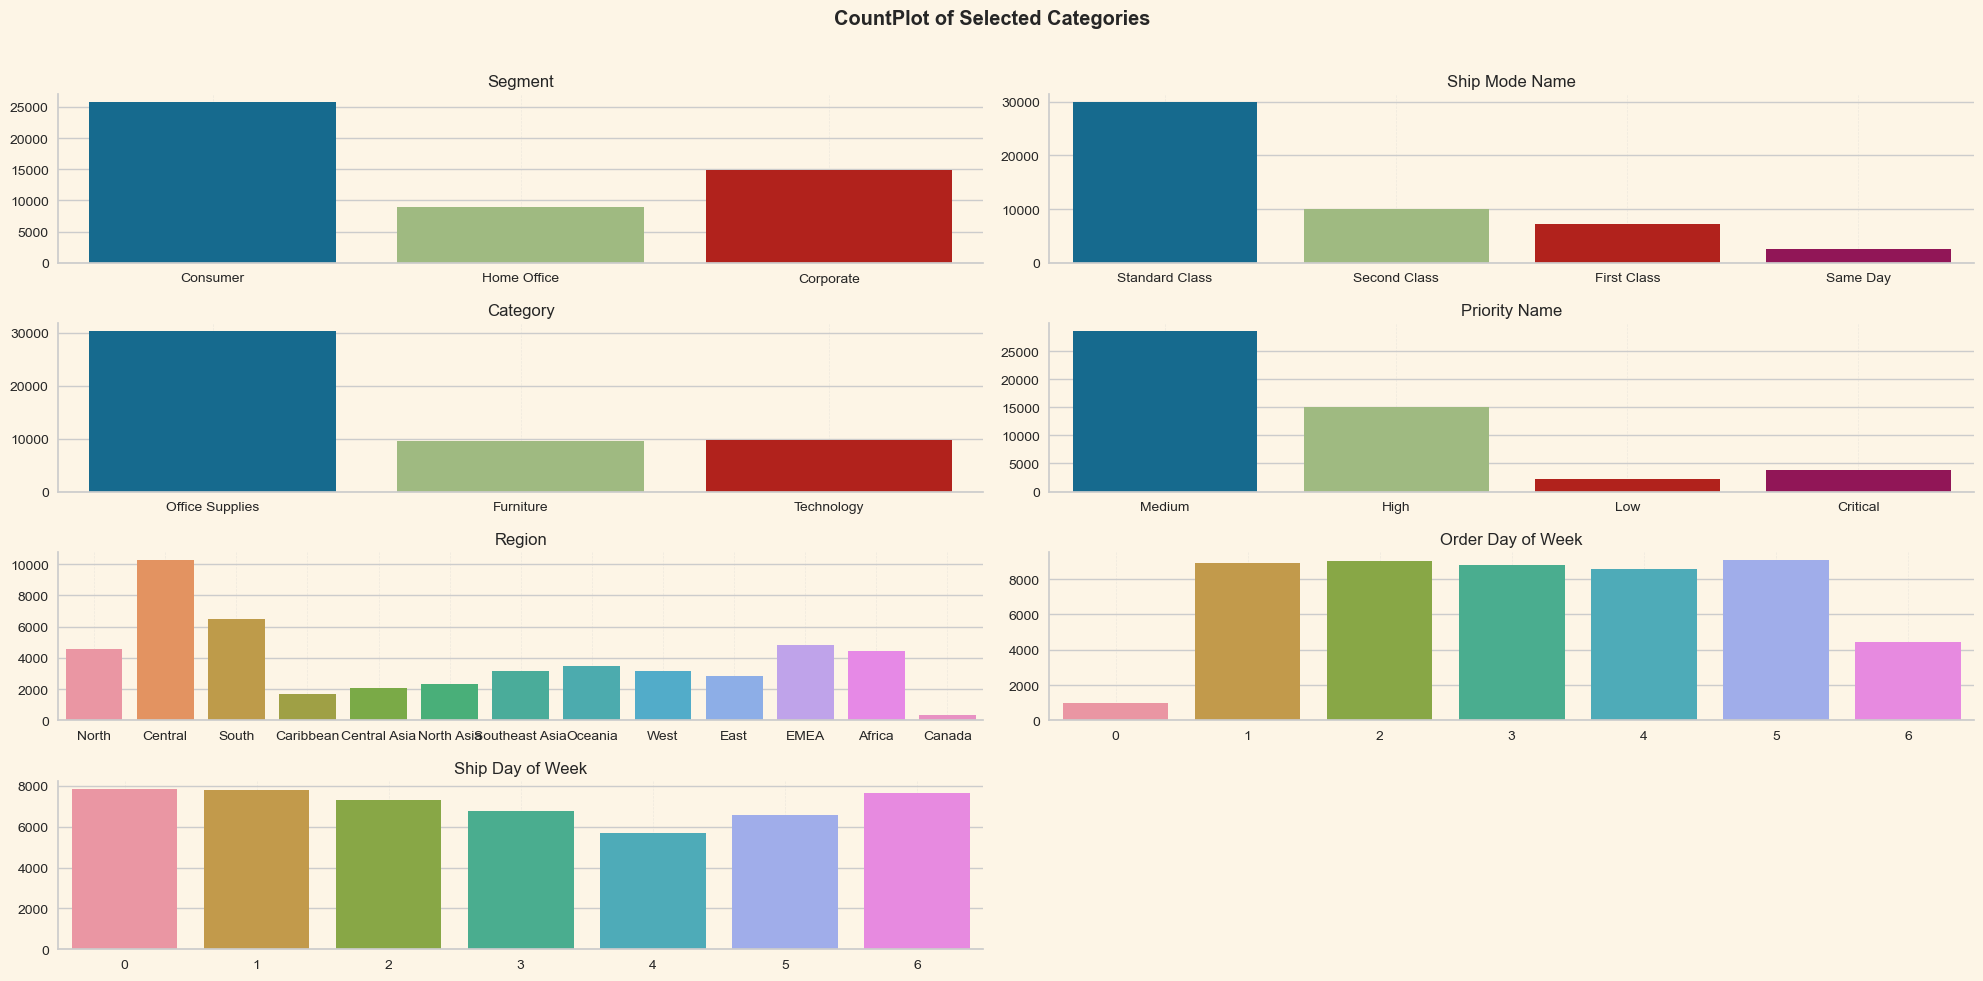

In [878]:
plots.Count_plot(X, Cats , hue=None)

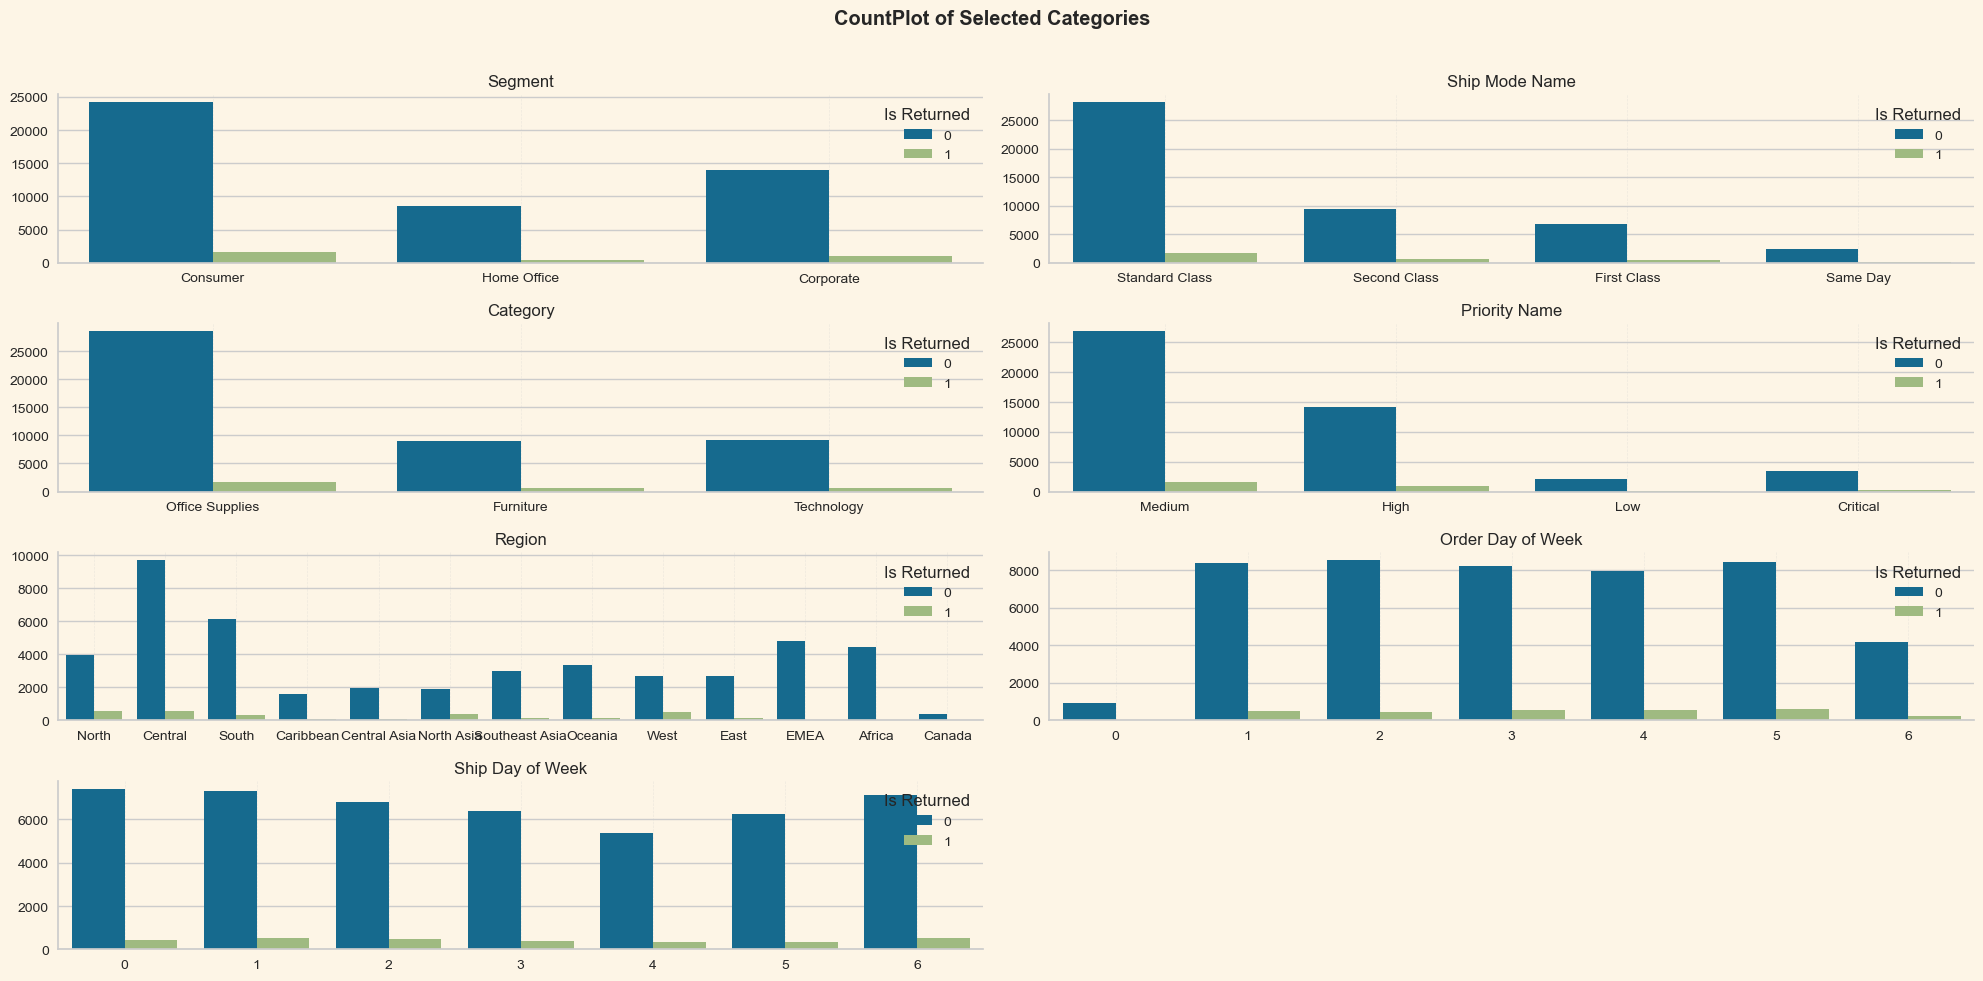

In [879]:
plots.Count_plot(X, Cats , hue=Y)

In [880]:
table=pd.crosstab( Y, X['Segment'])
# sns.heatmap (table, annot = True, fmt='.2f', cbar= False, cmap= "Greys", linewidths=0.5, square=True)
table

Segment,Consumer,Corporate,Home Office
Is Returned,,,
0,24177,13976,8537
1,1547,951,482


In [881]:
Y.value_counts()

Is Returned
0    46690
1     2980
Name: count, dtype: int64

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

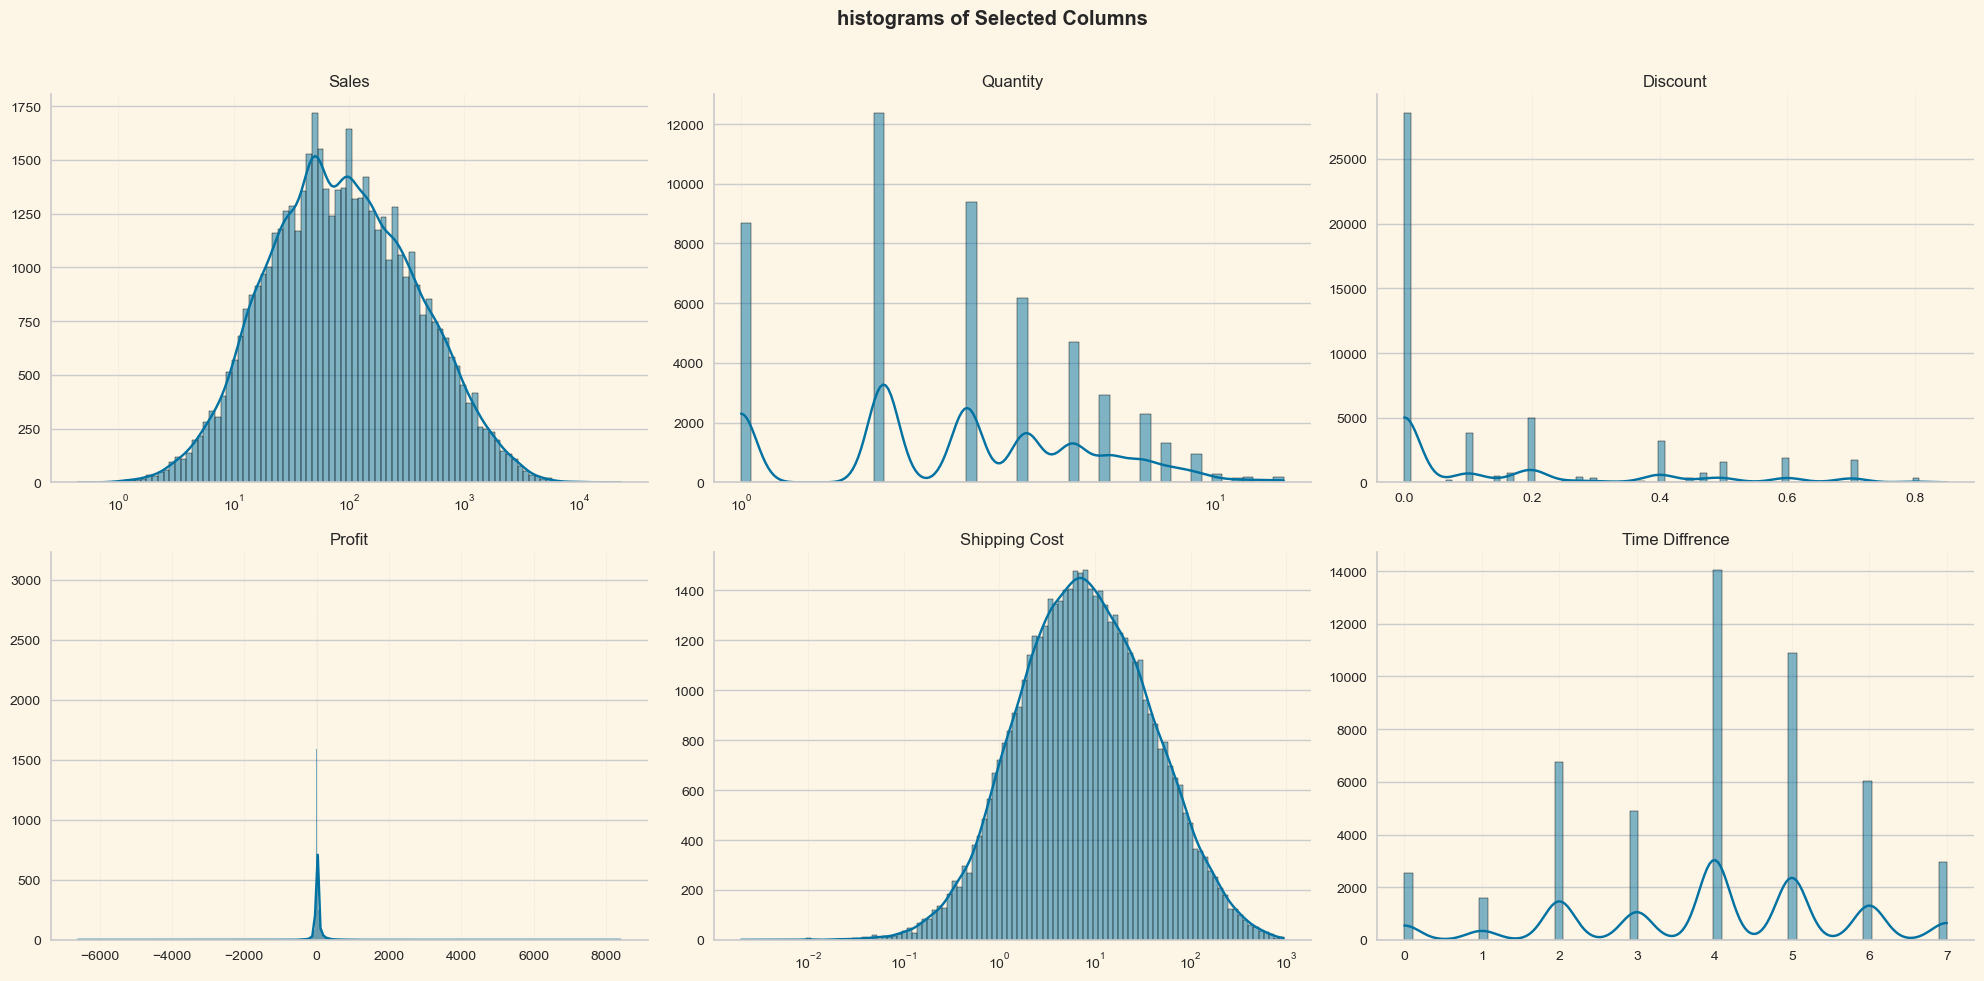

In [882]:
plots.hist_plot(X, Nums)

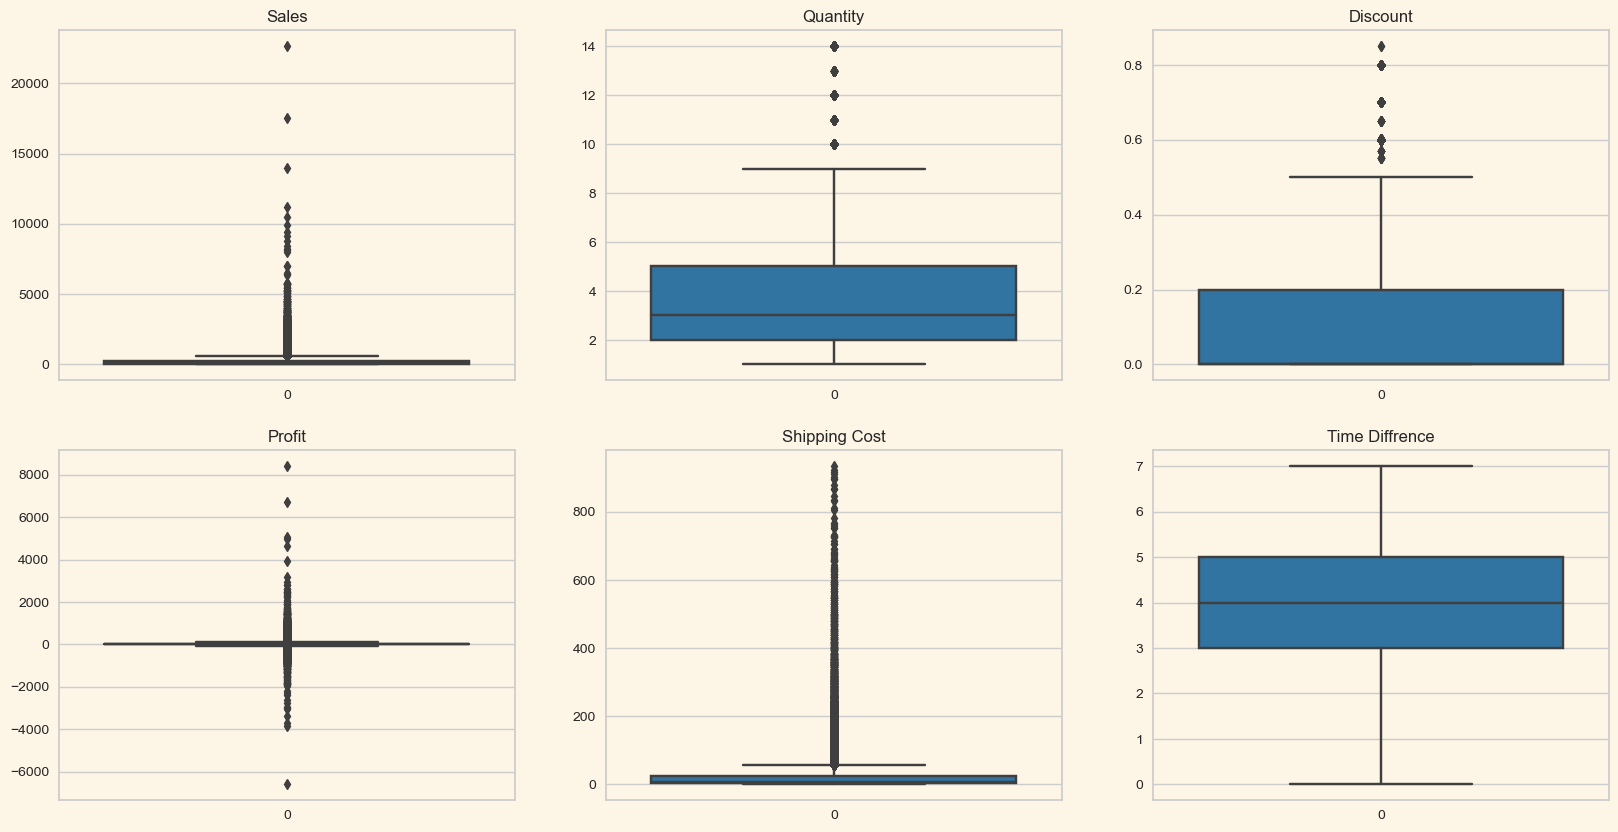

In [883]:
plots.Box_plot(X, Nums)

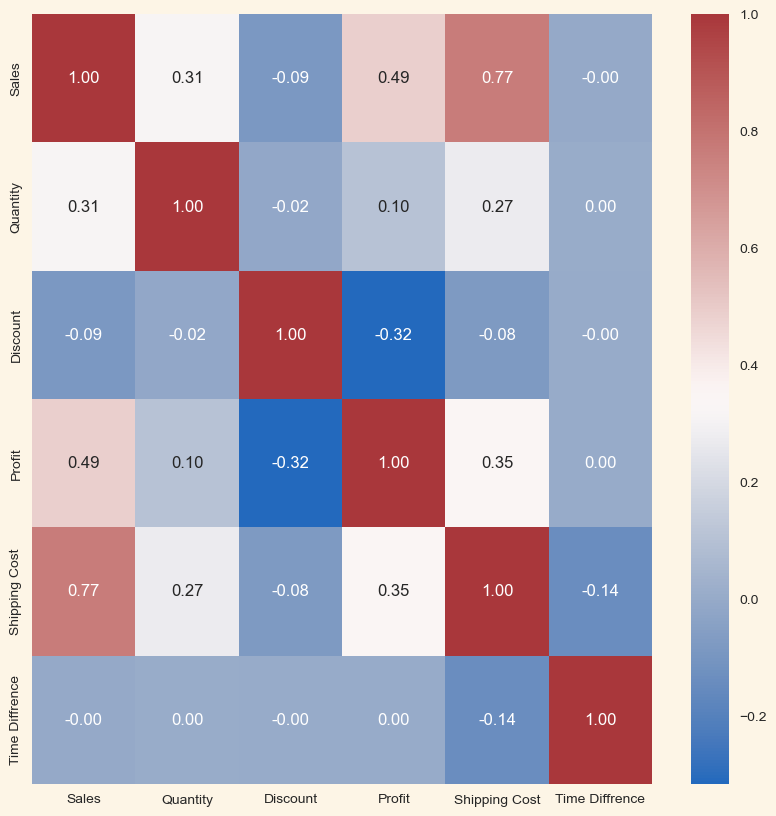

In [884]:
plots.corr_plot(X , Nums)

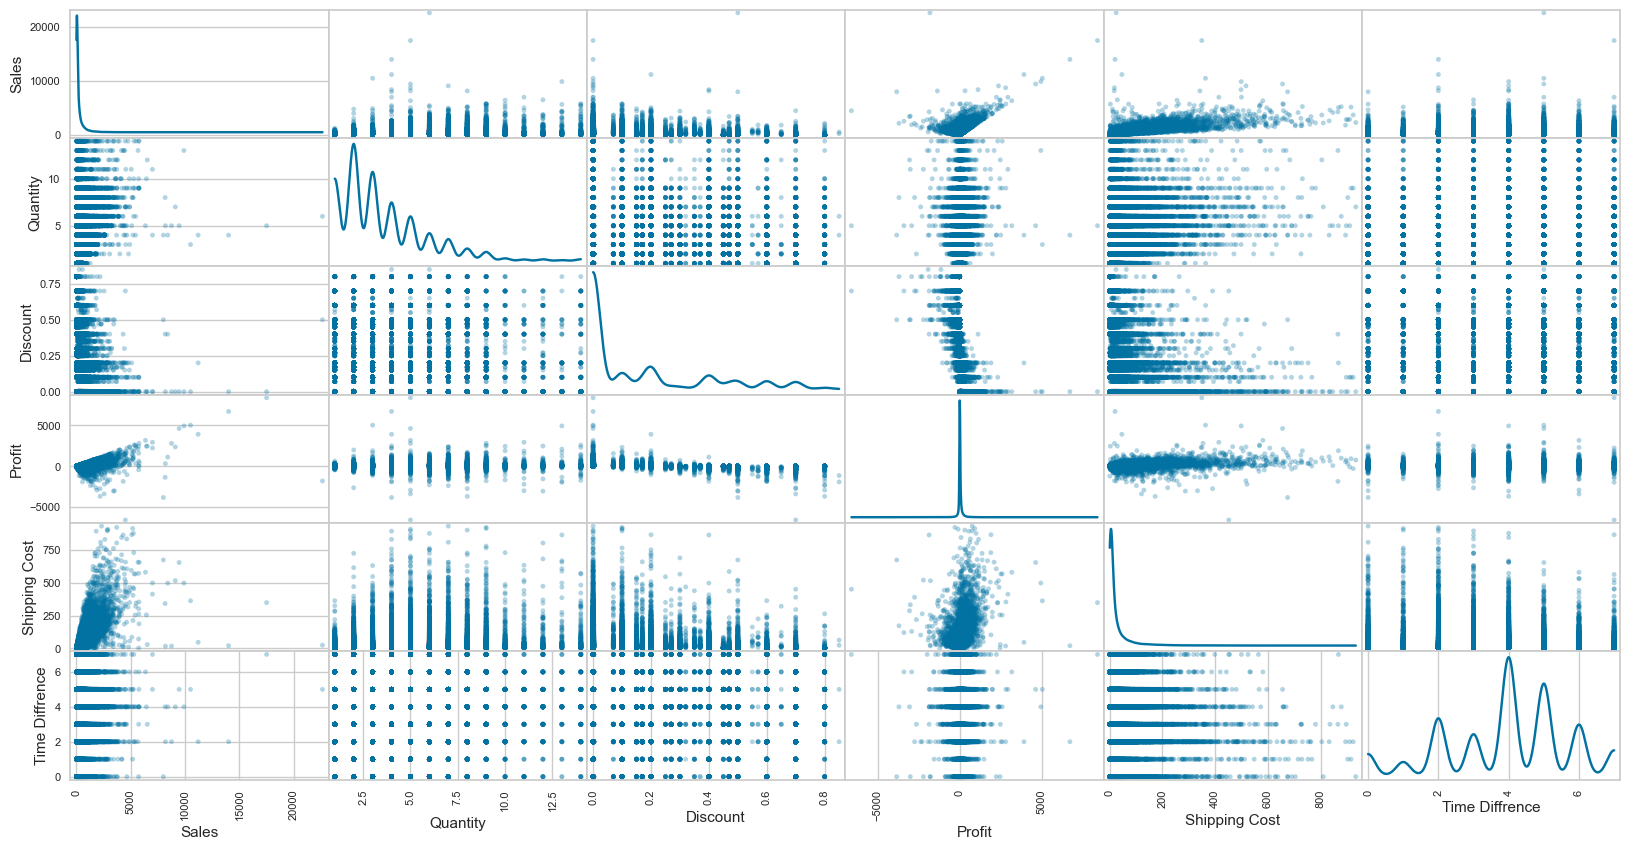

In [885]:
pd.plotting.scatter_matrix(X[Nums], diagonal='kde' , alpha=0.3 , figsize=(20,10))
plt.show()

In [886]:
X

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment,Ship Mode Name,Category,Priority Name,Region,Order Day of Week,Ship Day of Week,Time Diffrence
0,263.920013,2,0.0,5.240000,16.438999,Consumer,Standard Class,Office Supplies,Medium,North,2,1,6
1,13.880000,2,0.0,1.240000,1.332000,Home Office,Standard Class,Office Supplies,Medium,North,3,2,6
2,8.880000,2,0.0,3.720000,0.477000,Consumer,Standard Class,Office Supplies,Medium,North,2,1,6
3,703.159973,2,0.0,161.720001,62.397999,Consumer,Standard Class,Office Supplies,Medium,North,6,3,4
4,13.440000,2,0.0,2.400000,0.801000,Home Office,Standard Class,Office Supplies,Medium,North,6,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,142.591995,2,0.2,28.511999,6.405000,Consumer,Standard Class,Furniture,Medium,Caribbean,2,6,4
49666,28.351999,2,0.2,7.432000,1.719000,Corporate,Standard Class,Office Supplies,Medium,Caribbean,5,4,6
49667,61.824001,2,0.2,17.743999,2.808000,Corporate,Standard Class,Technology,Medium,Caribbean,5,4,6
49668,44.784000,3,0.2,-11.196000,2.494000,Corporate,Standard Class,Office Supplies,Medium,Caribbean,4,1,4


Splitting Train and Test data

In [887]:
X_train , X_test, Y_train , Y_test =train_test_split(X, Y, train_size=0.8 , test_size=0.2 , random_state=42)

In [888]:
X_train

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment,Ship Mode Name,Category,Priority Name,Region,Order Day of Week,Ship Day of Week,Time Diffrence
28676,1478.270020,8,0.2,92.391998,227.789993,Consumer,Second Class,Furniture,High,West,5,0,2
39317,218.843994,2,0.4,-21.936001,21.969999,Consumer,Standard Class,Furniture,High,Oceania,5,2,4
15298,27.360001,2,0.0,8.700000,2.240000,Consumer,Standard Class,Office Supplies,High,Central Asia,3,0,4
23261,61.799999,2,0.0,14.820000,12.200000,Corporate,First Class,Technology,Medium,Oceania,5,0,2
20904,17.490000,1,0.0,2.070000,1.690000,Consumer,Second Class,Office Supplies,High,Africa,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,151.679993,8,0.0,8.880000,7.290000,Corporate,Standard Class,Office Supplies,Medium,Oceania,5,3,5
44732,36.936001,3,0.4,-1.884000,3.322000,Consumer,Standard Class,Technology,Medium,Central,5,2,4
38158,4.203000,1,0.7,-5.757000,0.530000,Home Office,Standard Class,Office Supplies,High,EMEA,4,2,5
860,56.520000,2,0.0,11.820000,2.720000,Consumer,Standard Class,Office Supplies,Medium,South,3,0,4


In [889]:
Y_train

28676    0
39317    0
15298    0
23261    0
20904    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Is Returned, Length: 39736, dtype: int64

In [890]:
X_test

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment,Ship Mode Name,Category,Priority Name,Region,Order Day of Week,Ship Day of Week,Time Diffrence
8569,583.919983,4,0.0,262.679993,6.580000,Consumer,Standard Class,Technology,Medium,North,5,5,7
23113,74.080002,2,0.0,11.080000,4.863000,Consumer,First Class,Technology,Medium,Central,5,1,3
26945,29.900000,5,0.0,13.455000,5.840000,Consumer,Same Day,Office Supplies,Medium,West,5,5,0
6483,43.259998,3,0.0,14.275800,2.380000,Corporate,Standard Class,Office Supplies,Medium,South,3,1,5
29840,217.584000,2,0.2,19.038601,76.760002,Corporate,Second Class,Technology,Critical,Central,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28628,30.992001,13,0.2,10.072400,0.480000,Corporate,Second Class,Office Supplies,Medium,East,3,0,4
1796,66.580002,2,0.0,15.979200,8.400000,Consumer,Standard Class,Office Supplies,Medium,Central,5,4,6
12635,71.099998,5,0.0,1.350000,7.820000,Consumer,Standard Class,Office Supplies,High,North,0,4,4
33426,10.752000,1,0.6,-9.948000,1.030000,Consumer,Second Class,Office Supplies,Medium,EMEA,1,4,3


### Data Engineering

### Preprocessing

One-Hot encoding for categorical

In [891]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X_train[Cats])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(Cats))

Xtrain_encoded = pd.concat([X_train.drop(Cats, axis=1).reset_index(), one_hot_df], axis=1)
Xtrain_encoded=Xtrain_encoded.set_index('index')

In [892]:
Xtrain_encoded

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
index,,,,,,,,,,,,,,,,,,,,,
28676,1478.270020,8,0.2,92.391998,227.789993,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,218.843994,2,0.4,-21.936001,21.969999,4,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15298,27.360001,2,0.0,8.700000,2.240000,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,61.799999,2,0.0,14.820000,12.200000,2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,17.490000,1,0.0,2.070000,1.690000,4,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,151.679993,8,0.0,8.880000,7.290000,5,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,36.936001,3,0.4,-1.884000,3.322000,4,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38158,4.203000,1,0.7,-5.757000,0.530000,5,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Normalizing Columns
based on histograms I'll Normalize some of my columns with standard scaler and some of them with standard scaler

In [893]:
log_scales=['Sales', 'Shipping Cost' ]
std_scales=['Profit']
minmax_scales=['Quantity','Discount','Time Diffrence']

In [928]:
Xtrain_transformed=Xtrain_encoded.copy()

In [895]:
# scaler_logMinMax = MinMaxScaler(feature_range=(0, 1))
# def log_and_scale(X, scaler=scaler_logMinMax, shift=1e-9):
#     X_log = np.log(X + shift)
#     scaled = scaler.fit_transform(X_log)
#     return pd.DataFrame(scaled, index=X.index, columns=X.columns)


# def inv_log_and_scale(X, scaler=scaler_logMinMax, shift=1e-9):
#     unscaled = scaler.inverse_transform(X)
#     return pd.DataFrame(np.exp(unscaled) - shift, index=X.index, columns=X.columns)


# log_and_scale_transformer = FunctionTransformer(
#     func=log_and_scale, 
#     inverse_func=inv_log_and_scale, 
#     validate=False  # Allow pandas
# )

In [929]:
# Log transformation function
scaler_logMinMax = MinMaxScaler(feature_range=(0, 1))
def log_and_scale(X:npt.ArrayLike, scaler=scaler_logMinMax, shift:int=0):
    X_log = np.log(X + shift)
    scaled = scaler.fit_transform(X_log)
    return pd.DataFrame(scaled, index=X.index, columns=X.columns)


def inv_log_and_scale(X:npt.ArrayLike, scaler=scaler_logMinMax, shift:int=0):
    unscaled = scaler.inverse_transform(X)
    return pd.DataFrame(np.exp(unscaled) - shift, index=X.index, columns=X.columns)

log_and_scale_transformer = FunctionTransformer(
    func=log_and_scale, 
    inverse_func=inv_log_and_scale, 
    validate=False,  # Allow pandas
    check_inverse=True,
)

In [930]:
Xtrain_transformed[log_scales]=log_and_scale_transformer.fit_transform(Xtrain_transformed[log_scales])

In [931]:
Xtrain_transformed

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
index,,,,,,,,,,,,,,,,,,,,,
28676,0.748252,8,0.2,3932.381989,0.891939,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,0.572017,2,0.4,3818.053989,0.712774,4,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15298,0.380190,2,0.0,3848.689990,0.537865,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,0.455363,2,0.0,3854.809990,0.667711,2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,0.338910,1,0.0,3842.059990,0.516281,4,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.538197,8,0.0,3848.869990,0.628263,5,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,0.407877,3,0.4,3838.105990,0.568055,4,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38158,0.207368,1,0.7,3834.232990,0.427447,5,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [932]:
Quantity_MinMax = MinMaxScaler()
Discount_MinMax = MinMaxScaler()
Time_MinMax = MinMaxScaler()
Xtrain_transformed['Quantity']=Quantity_MinMax.fit_transform(Xtrain_transformed[['Quantity']])
Xtrain_transformed['Discount']=Discount_MinMax.fit_transform(Xtrain_transformed[['Discount']])
Xtrain_transformed['Time Diffrence']=Time_MinMax.fit_transform(Xtrain_transformed[['Time Diffrence']])

In [ ]:
# Xtrain_transformed['Profit']=Xtrain_transformed['Profit']-Xtrain_transformed['Profit'].min()

In [933]:
Xtrain_transformed

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
index,,,,,,,,,,,,,,,,,,,,,
28676,0.748252,0.538462,0.235294,3932.381989,0.891939,0.285714,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,0.572017,0.076923,0.470588,3818.053989,0.712774,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15298,0.380190,0.076923,0.000000,3848.689990,0.537865,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,0.455363,0.076923,0.000000,3854.809990,0.667711,0.285714,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,0.338910,0.000000,0.000000,3842.059990,0.516281,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.538197,0.538462,0.000000,3848.869990,0.628263,0.714286,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,0.407877,0.153846,0.470588,3838.105990,0.568055,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38158,0.207368,0.000000,0.823529,3834.232990,0.427447,0.714286,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [934]:
scaler_MaxAbs = StandardScaler()
Xtrain_transformed['Profit']=scaler_MaxAbs.fit_transform(Xtrain_transformed[['Profit']])

In [935]:
Xtrain_transformed

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
index,,,,,,,,,,,,,,,,,,,,,
28676,0.748252,0.538462,0.235294,0.370011,0.891939,0.285714,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,0.572017,0.076923,0.470588,-0.293387,0.712774,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15298,0.380190,0.076923,0.000000,-0.115619,0.537865,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,0.455363,0.076923,0.000000,-0.080107,0.667711,0.285714,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,0.338910,0.000000,0.000000,-0.154090,0.516281,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.538197,0.538462,0.000000,-0.114574,0.628263,0.714286,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,0.407877,0.153846,0.470588,-0.177033,0.568055,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38158,0.207368,0.000000,0.823529,-0.199507,0.427447,0.714286,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

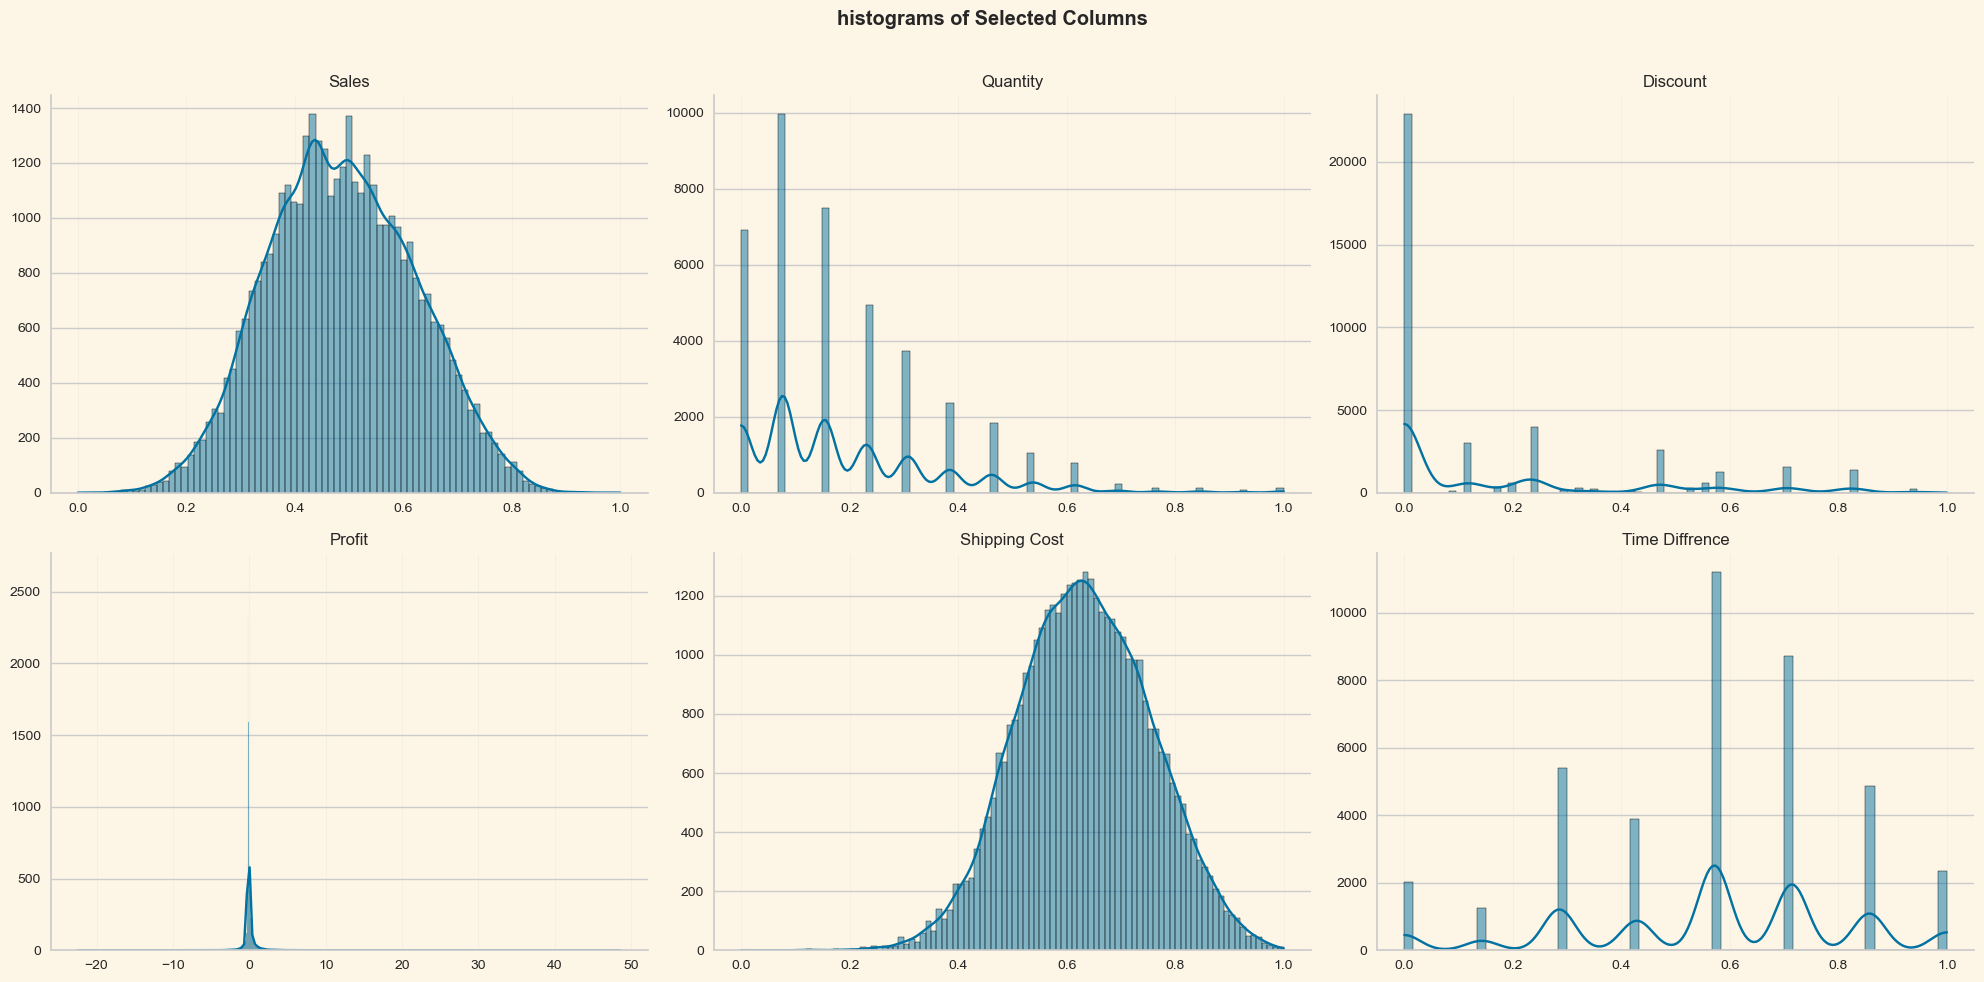

In [936]:
plots.hist_plot(Xtrain_transformed,Nums)

In [937]:
Xtrain_transformed

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
index,,,,,,,,,,,,,,,,,,,,,
28676,0.748252,0.538462,0.235294,0.370011,0.891939,0.285714,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,0.572017,0.076923,0.470588,-0.293387,0.712774,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15298,0.380190,0.076923,0.000000,-0.115619,0.537865,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,0.455363,0.076923,0.000000,-0.080107,0.667711,0.285714,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,0.338910,0.000000,0.000000,-0.154090,0.516281,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.538197,0.538462,0.000000,-0.114574,0.628263,0.714286,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,0.407877,0.153846,0.470588,-0.177033,0.568055,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38158,0.207368,0.000000,0.823529,-0.199507,0.427447,0.714286,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Handling Imbalance Data

In [938]:
sm = SMOTE(k_neighbors=5)
X_res, y_res = sm.fit_resample(Xtrain_transformed, Y_train)

In [948]:
X_res

,Sales,Quantity,Discount,Profit,Shipping Cost,Time Diffrence,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode Name_First Class,...,Order Day of Week_4,Order Day of Week_5,Order Day of Week_6,Ship Day of Week_0,Ship Day of Week_1,Ship Day of Week_2,Ship Day of Week_3,Ship Day of Week_4,Ship Day of Week_5,Ship Day of Week_6
0,0.748252,0.538462,0.235294,0.370011,0.891939,0.285714,1.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.572017,0.076923,0.470588,-0.293387,0.712774,0.571429,1.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.380190,0.076923,0.000000,-0.115619,0.537865,0.571429,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.455363,0.076923,0.000000,-0.080107,0.667711,0.285714,0.000000,1.000000,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.338910,0.000000,0.000000,-0.154090,0.516281,0.571429,1.000000,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74715,0.401318,0.170127,0.000000,-0.120768,0.562388,0.857143,1.000000,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74716,0.506939,0.132271,0.319943,-0.613236,0.684393,0.571429,0.640240,0.359760,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74717,0.632424,0.605003,0.000000,0.063293,0.781893,0.714286,0.000000,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74718,0.173473,0.076923,0.759624,-0.180445,0.422584,0.000000,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [940]:
Counter(y_res)

Counter({0: 37360, 1: 37360})

### Training Model

forst I want to find the best model with gridsearch

In [956]:
model_params ={
    # 'svm' : {
    #     'model' : svm.SVC(gamma='auto'),
    #     'params' : {
    #         'C' : [1,10,20],
    #         'kernel' : ['rbf' , 'linear']
    #     }
    # },
    'random_forest': {
        'model':RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors':[3,5,9],
            # 'weights':['uniform', 'distance']
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = 'liblinear' , multi_class = 'auto'),
        'params': {
            'C' : [1,10]
        }
    }, 
}

In [957]:
scores =[]

for model_name , mp in model_params.items():
    cls = GridSearchCV(mp['model'] , mp['params'] , cv=5 , return_train_score=False , n_jobs=-1) 
    cls.fit(X_res , y_res)
    scores.append({
        'model' : model_name ,
        'best_score' : cls.best_score_ , 
        'best_params' : cls.best_params_
    })

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [959]:
score_df = pd.DataFrame(scores , columns=['model','best_score' , 'best_params'])

In [960]:
score_df

,model,best_score,best_params
0,random_forest,0.966368,{'n_estimators': 10}
1,knn,0.908592,{'n_neighbors': 3}
2,logistic_regression,0.692786,{'C': 10}


I chose the best model which is random forrest

In [962]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)
classifier.fit(X_res, y_res)


RandomForestClassifier(n_estimators=10, random_state=42)

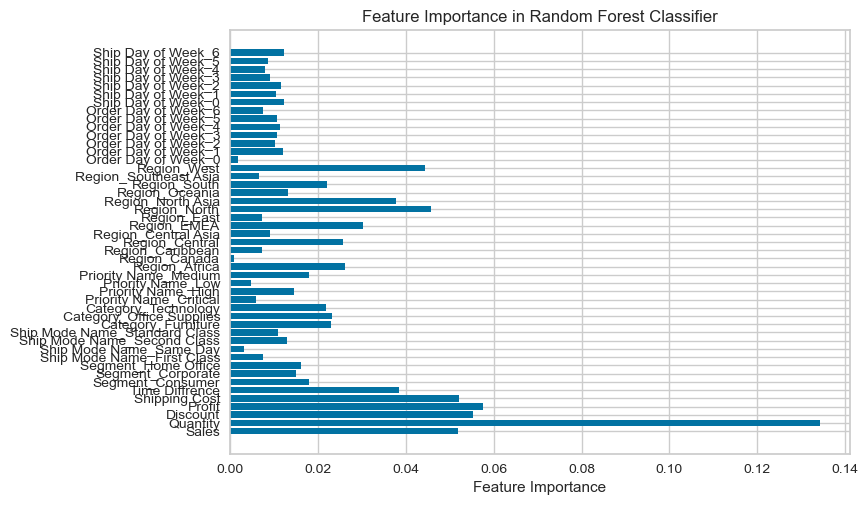

In [964]:
feature_importances = classifier.feature_importances_
features=['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Time Diffrence', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Ship Mode Name_First Class',
       'Ship Mode Name_Same Day', 'Ship Mode Name_Second Class',
       'Ship Mode Name_Standard Class', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology',
       'Priority Name_Critical', 'Priority Name_High', 'Priority Name_Low',
       'Priority Name_Medium', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Order Day of Week_0', 'Order Day of Week_1',
       'Order Day of Week_2', 'Order Day of Week_3', 'Order Day of Week_4',
       'Order Day of Week_5', 'Order Day of Week_6', 'Ship Day of Week_0',
       'Ship Day of Week_1', 'Ship Day of Week_2', 'Ship Day of Week_3',
       'Ship Day of Week_4', 'Ship Day of Week_5', 'Ship Day of Week_6']

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


Applying changes to features in x test

In [968]:
one_hot_encoded_test = encoder.transform(X_test[Cats])

one_hot_test_df = pd.DataFrame(one_hot_encoded_test, 
                          columns=encoder.get_feature_names_out(Cats))

Xtest_encoded = pd.concat([X_test.drop(Cats, axis=1).reset_index(), one_hot_test_df], axis=1)
Xtest_encoded=Xtest_encoded.set_index('index')

In [969]:
Xtest_transformed=Xtest_encoded.copy()

In [970]:
Xtest_transformed[log_scales]=log_and_scale_transformer.transform(Xtest_transformed[log_scales])

In [971]:
Xtest_transformed['Quantity']=Quantity_MinMax.transform(Xtest_transformed[['Quantity']])
Xtest_transformed['Discount']=Discount_MinMax.transform(Xtest_transformed[['Discount']])
Xtest_transformed['Time Diffrence']=Time_MinMax.transform(Xtest_transformed[['Time Diffrence']])
Xtest_transformed['Profit']=scaler_MaxAbs.transform(Xtest_transformed[['Profit']])

In [973]:
y_pred = classifier.predict(Xtest_transformed)

In [974]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy: 93.44%


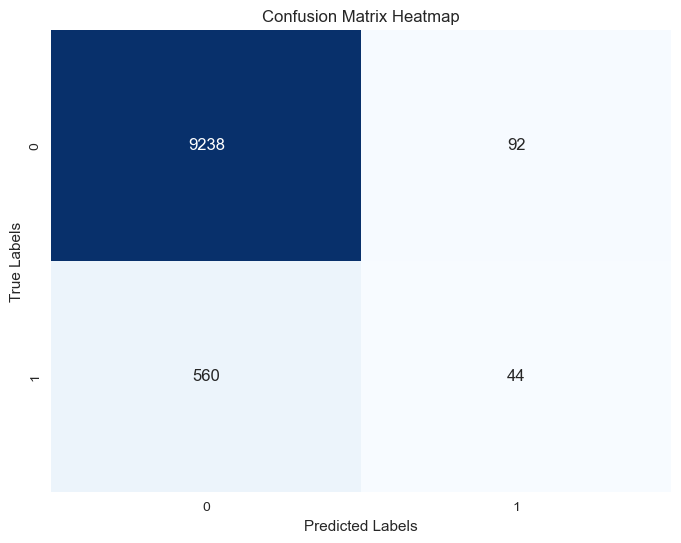

In [977]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=[0,1], yticklabels=[0,1])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()